In [209]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [210]:
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
headers = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

data = pd.read_csv(path, names=headers,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [211]:
data.head

<bound method NDFrame.head of       MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
0            70       1  
1            70       1  
2            70       1  
3

In [212]:
data.tail

<bound method NDFrame.tail of       MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
0            70       1  
1            70       1  
2            70       1  
3

In [213]:
data.info

<bound method DataFrame.info of       MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
0            70       1  
1            70       1  
2            70       1  

In [214]:
data.shape

(398, 8)

In [215]:
data.describe

<bound method NDFrame.describe of       MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
0            70       1  
1            70       1  
2            70       1

In [218]:
data.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object')

In [220]:
data.replace(("?","nan"), np.nan, inplace = True)

In [221]:
#Replacing NaN values for Horsepower with their mean
avg = data["Horsepower"].astype("float").mean(axis=0)
data["Horsepower"].replace(np.nan, avg, inplace=True)
data.Horsepower.unique()

array([130.   , 165.   , 150.   , 140.   , 198.   , 220.   , 215.   ,
       225.   , 190.   , 170.   , 160.   ,  95.   ,  97.   ,  85.   ,
        88.   ,  46.   ,  87.   ,  90.   , 113.   , 200.   , 210.   ,
       193.   , 104.469, 100.   , 105.   , 175.   , 153.   , 180.   ,
       110.   ,  72.   ,  86.   ,  70.   ,  76.   ,  65.   ,  69.   ,
        60.   ,  80.   ,  54.   , 208.   , 155.   , 112.   ,  92.   ,
       145.   , 137.   , 158.   , 167.   ,  94.   , 107.   , 230.   ,
        49.   ,  75.   ,  91.   , 122.   ,  67.   ,  83.   ,  78.   ,
        52.   ,  61.   ,  93.   , 148.   , 129.   ,  96.   ,  71.   ,
        98.   , 115.   ,  53.   ,  81.   ,  79.   , 120.   , 152.   ,
       102.   , 108.   ,  68.   ,  58.   , 149.   ,  89.   ,  63.   ,
        48.   ,  66.   , 139.   , 103.   , 125.   , 133.   , 138.   ,
       135.   , 142.   ,  77.   ,  62.   , 132.   ,  84.   ,  64.   ,
        74.   , 116.   ,  82.   ])

In [222]:
data.isnull()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False


In [223]:
data.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object')

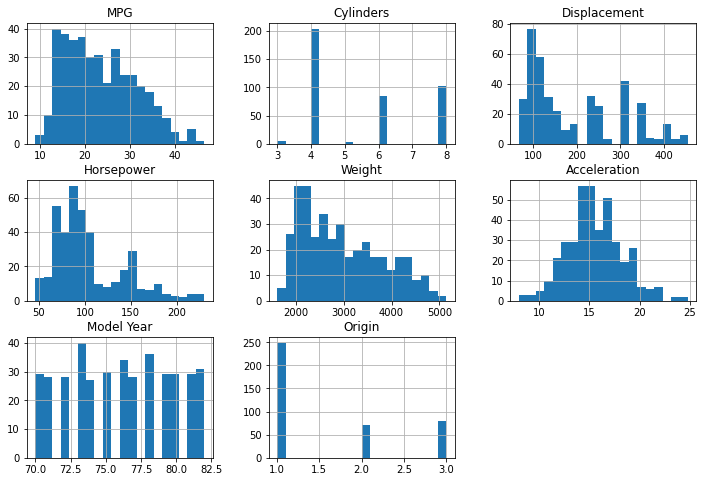

In [224]:
#Features of the cars
data.hist(figsize=(12,8),bins=20)
plt.show()

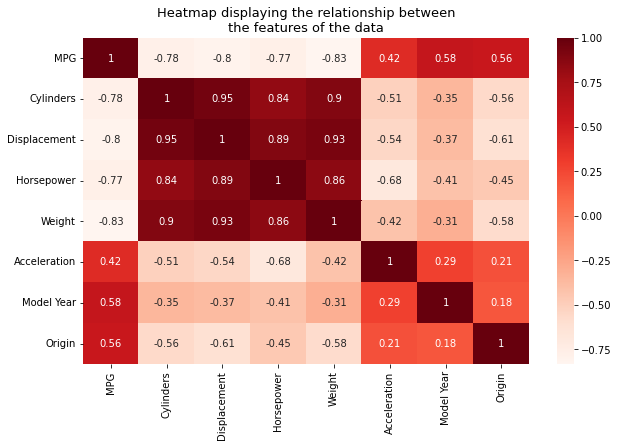

In [225]:
#Relationships between the MPG and other features.
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between\nthe features of the data',
         fontsize=13)
plt.show()

In [226]:
data = data.dropna()

In [227]:
data.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object')

In [228]:
origin = data.pop('Origin')

In [229]:
data['USA'] = (origin == 1)*1.0
data['Europe'] = (origin == 2)*1.0
data['Japan'] = (origin == 3)*1.0
data.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


# Split the data into train and test

In [230]:
train_data = data.sample(frac=0.8,random_state=0)
test_data = data.drop(train_data.index)

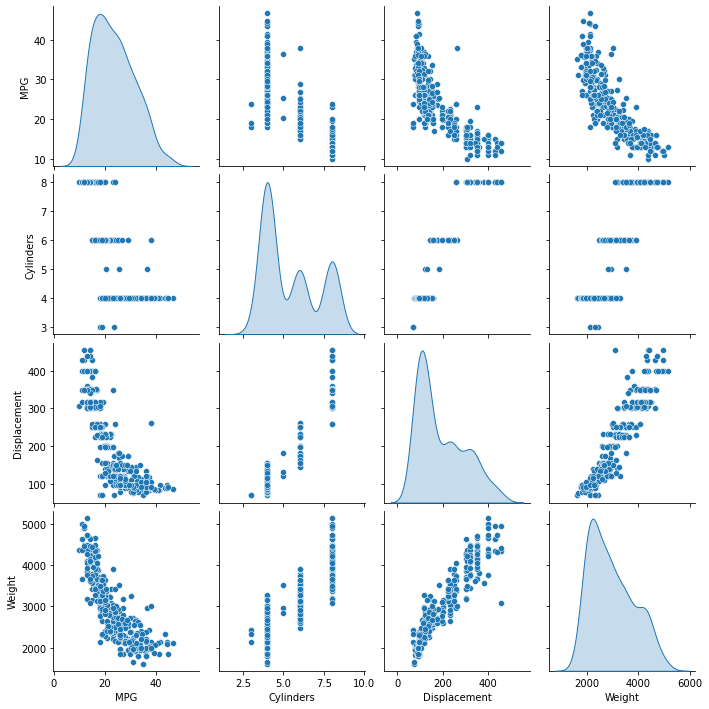

In [231]:
sns.pairplot(train_data[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [232]:
train_stats = train_data.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,318.0,5.427673,1.682941,3.0,4.00,4.0,6.00,8.0
Displacement,318.0,193.061321,103.812742,70.0,100.25,151.0,259.50,455.0
Horsepower,318.0,104.073418,38.368477,46.0,75.25,92.0,120.00,230.0
Weight,318.0,2963.823899,844.749805,1613.0,2219.25,2792.5,3571.25,5140.0
Acceleration,318.0,15.595912,2.796282,8.0,13.90,15.5,17.30,24.8
Model Year,318.0,75.946541,3.705266,70.0,73.00,76.0,79.00,82.0
USA,318.0,0.641509,0.480313,0.0,0.00,1.0,1.00,1.0
Europe,318.0,0.163522,0.370424,0.0,0.00,0.0,0.00,1.0
Japan,318.0,0.194969,0.396801,0.0,0.00,0.0,0.00,1.0


In [233]:
train_labels = train_data.pop('MPG')
test_labels = test_data.pop('MPG')

In [234]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_data)
normed_test_data = norm(test_data)

# Building Model

In [235]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_data.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [236]:
model = build_model()

In [237]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                640       
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [238]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[0.848],
       [0.184],
       [0.897],
       [0.678],
       [0.197],
       [0.493],
       [0.455],
       [0.337],
       [0.702],
       [0.44 ]], dtype=float32)

# Training the model

In [239]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

history = model.fit(normed_train_data, train_labels,epochs=1000,validation_split = 0.2,verbose=0,callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [240]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.854298,1.106264,2.854298,7.579508,1.955432,7.579508,995
996,2.532024,1.027202,2.532024,7.645482,1.958640,7.645482,996
997,2.782578,1.095684,2.782578,7.824244,2.030690,7.824244,997
998,2.779290,1.076466,2.779290,8.068369,2.111163,8.068369,998
999,2.676927,1.072180,2.676927,7.625883,1.953890,7.625883,999


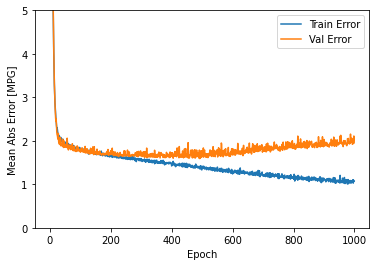

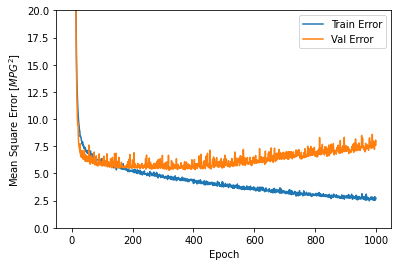

In [241]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


..............................................................................

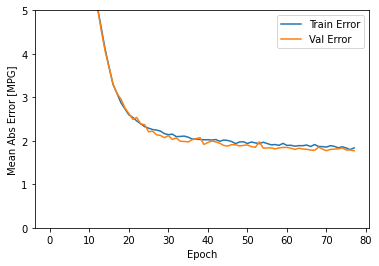

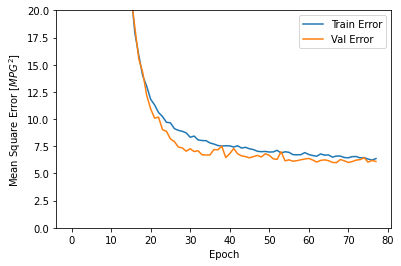

In [264]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=1000,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [243]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  1.93 MPG


# Predict MPG values using data in the testing set

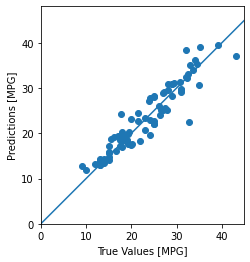

In [244]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

# Error Distribution

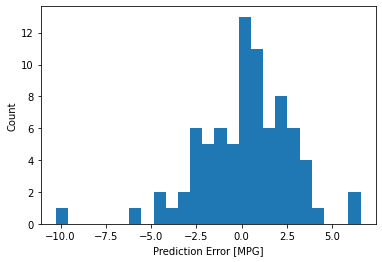

In [245]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [246]:
data.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'USA', 'Europe', 'Japan'],
      dtype='object')

In [247]:
factors = ['Cylinders','Displacement','Horsepower','Acceleration','Weight','Model Year']
X = pd.DataFrame(data[factors].copy())
y = data['MPG'].copy()

In [248]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [249]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
X_train.shape[0] == y_train.shape[0]

True

In [250]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [251]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [252]:
regressor.fit(X_train,y_train)

LinearRegression()

In [253]:
y_predicted = regressor.predict(X_test)

In [254]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
mse

3.431461625491621

In [255]:
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(n_estimators=4000)
gb_regressor.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=4000)

In [256]:
gb_regressor.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 4000,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [257]:
y_predicted_gbr = gb_regressor.predict(X_test)

In [258]:
mse_bgr = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted_gbr))
mse_bgr

2.5164430819522834

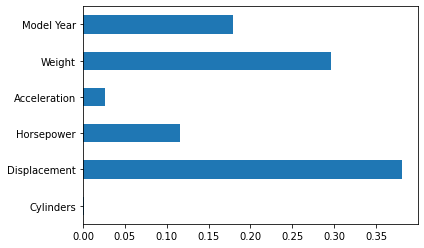

In [259]:
fi= pd.Series(gb_regressor.feature_importances_,index=factors)
fi.plot.barh()

In [ ]:
pip install flask-ngrok

**Link Google Drive with Colab**

In [ ]:
from google.colab import drive 
drive.mount('/drive')

In [ ]:
!pip install flask gevent requests pillow flask-ngrok pyngrok

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask, render_template, request

In [ ]:
procfile = 'web: gunicorn app:app'
procfiles = open('/content/Procfile', 'w')

In [ ]:
procfiles.write(procfile)

In [ ]:
procfiles.close()

In [ ]:
!mkdir '/content/templates'

**Data preprocessing**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
vectorizer = TfidfVectorizer( 
                             strip_accents='unicode', 
                             decode_error='replace',
                             dtype='int32',                              
                             analyzer="word", 
                             ngram_range=(1, 2), 
                             min_df=2)

**Connecting webpage with ANN**

In [ ]:
import pyngrok

In [ ]:
!ngrok authtoken 2ElvUsOWqaMY22pOX3juthVikxW_6fh4DFTCFRVEuTnbDgYHS

In [ ]:
app = Flask(__name__)
run_with_ngrok(app)

@app.route('/')
def home():
  return render_template('index.html')

@app.route('/', methods=['POST'])
def prediction():
  data = request.form['textbox']
  features = [data]
  X_deployment = vectorizer.transform(features)
  X_deployment_best = selector.transform(X_deployment)
  X_deployment_best_array = X_deployment_best.toarray()
  

  return render_template('index.html', prediction=label)

if __name__=='__main__':
  app.run()